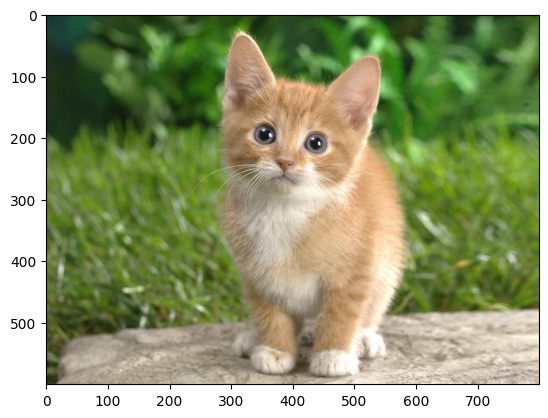

In [2]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Resmin açılması
image_path = "cat1.jpg"
image = Image.open(image_path)

# Görüntünün numpy dizisine çevirilmesi
image_np = np.array(image)
plt.imshow(image)
plt.show()


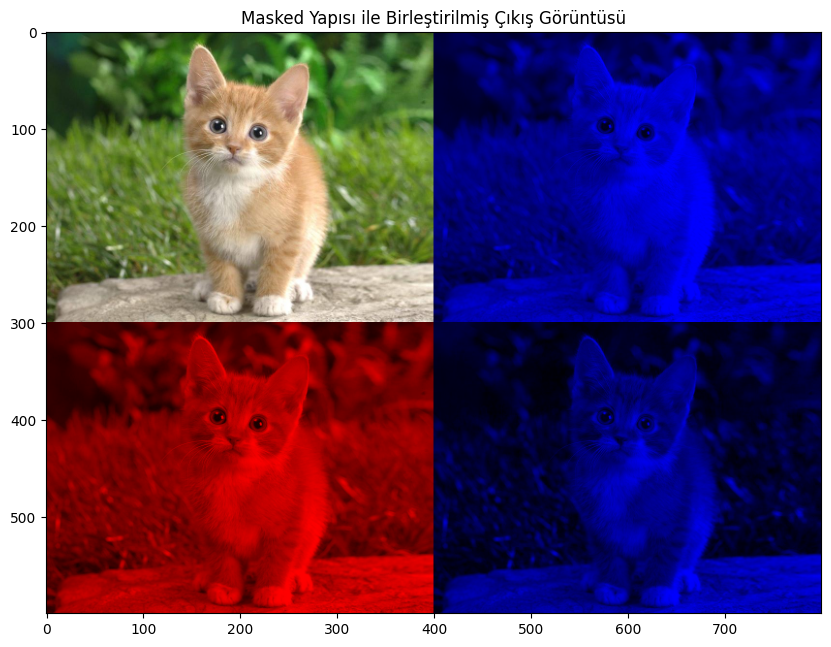

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Orijinal resmi yüklenmesi
image_path = '/content/cat1.jpg'
original_img = cv2.imread(image_path)

# cv2 kütüphanesi BGR formatında yüklendiği için RGB'ye çevirilmesi
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Resmi yarı boyutuna küçültülmesi
resized_img = cv2.resize(original_img_rgb, (0, 0), fx=0.5, fy=0.5)

# Resmin HSV ve Lab renk paletlerine dönüştürülmesi (RGB temelinde)
hsv_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2HSV)
lab_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2Lab)

# HSV Value kanalının maske yapısı ile çıkartılması
hsv_value_masked = hsv_img.copy()
hsv_value_masked[:, :, 0] = 0  # H kanalını sıfırla
hsv_value_masked[:, :, 1] = 0  # S kanalını sıfırla
value_channel = hsv_value_masked  # Yalnızca Value kanalını içerir

# Lab'ın L kanalının maske yapısı ile çıkartılması
lab_l_masked = lab_img.copy()
lab_l_masked[:, :, 1] = 0  # a kanalını sıfırla
lab_l_masked[:, :, 2] = 0  # b kanalını sıfırla
l_channel = lab_l_masked

# RGB resminden sadece Mavi kanalın maske ile çıkartılması
blue_channel_masked = resized_img.copy()
blue_channel_masked[:, :, 0] = 0  # G kanalını sıfırla
blue_channel_masked[:, :, 1] = 0  # R kanalını sıfırla
blue_channel = blue_channel_masked

# Orijinal resim ile aynı boyutta boş bir çıkış görüntüsü hazırlanması
height, width, _ = resized_img.shape
output_img = np.zeros((height * 2, width * 2, 3), dtype=np.uint8)

# Her bir çeyreği çıkış görüntüsüne yerleştir
output_img[:height, :width] = resized_img  # Sol üst: Orijinal
output_img[:height, width:] = value_channel  # Sağ üst: HSV Value kanalı
output_img[height:, :width] = l_channel  # Sol alt: Lab L kanalı
output_img[height:, width:] = blue_channel  # Sağ alt: Mavi kanalı

# Sonucu göster
plt.figure(figsize=(10, 10))
plt.imshow(output_img)
plt.axis('on')
plt.title('Masked Yapısı ile Birleştirilmiş Çıkış Görüntüsü')
plt.show()


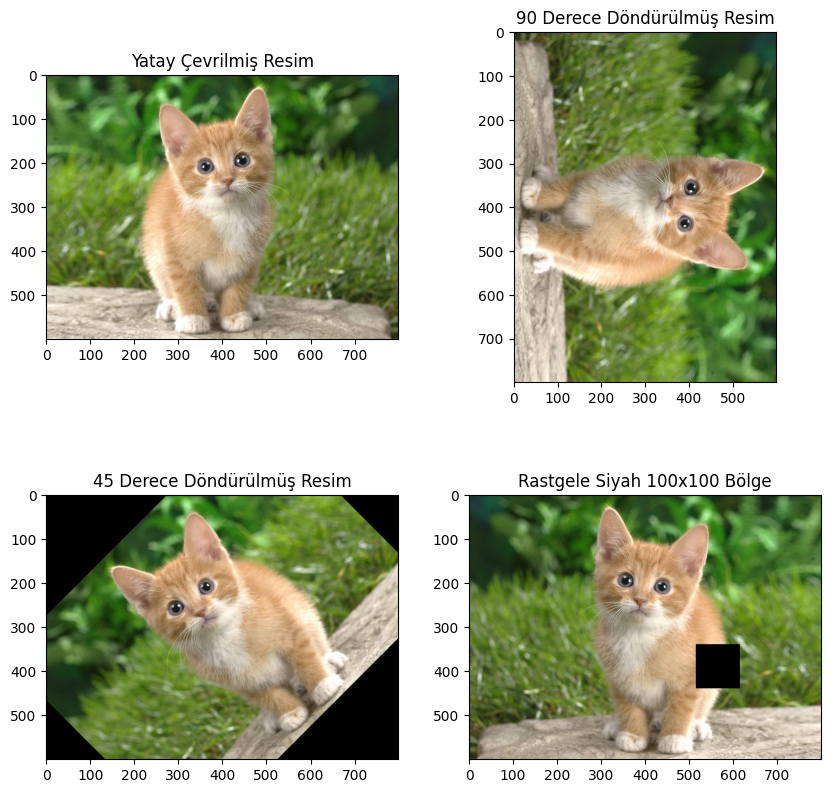

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Orijinal resmin yüklenmesi
image_np = cv2.imread('cat1.jpg')

# 2. Orijinal resmi kullan
image_resized = image_np  # Boyut değiştirmeden kullanıyoruz

# 3. Orijinal görüntünün yatay çevirilmesi
flipped_image = cv2.flip(image_resized, 1)

# 4. 90 derece döndürülmesi
rotated_90 = cv2.rotate(image_resized, cv2.ROTATE_90_CLOCKWISE)

# 5. 45 derece döndürme
(h, w) = image_resized.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_45 = cv2.warpAffine(image_resized, M, (w, h))

# 6. Rastgele 100x100 bir alanın sıfırlanması
image_with_zeros = image_resized.copy()
x, y = np.random.randint(0, image_resized.shape[1] - 100), np.random.randint(0, image_resized.shape[0] - 100)
image_with_zeros[y:y+100, x:x+100] = 0

# Görüntüleri gösterelim
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))  # BGR'den RGB'ye çevirilmesi
axs[0, 0].set_title("Yatay Çevrilmiş Resim")
axs[0, 1].imshow(cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB))  # BGR'den RGB'ye çevirilmesi
axs[0, 1].set_title("90 Derece Döndürülmüş Resim")
axs[1, 0].imshow(cv2.cvtColor(rotated_45, cv2.COLOR_BGR2RGB))  # BGR'den RGB'ye çevirilmesi
axs[1, 0].set_title("45 Derece Döndürülmüş Resim")
axs[1, 1].imshow(cv2.cvtColor(image_with_zeros, cv2.COLOR_BGR2RGB))  # BGR'den RGB'ye çevirilmesi
axs[1, 1].set_title("Rastgele Siyah 100x100 Bölge")

for ax in axs.flat:
    ax.axis('on')

plt.show()



Mavi X işaretlerinin sayısı: 26


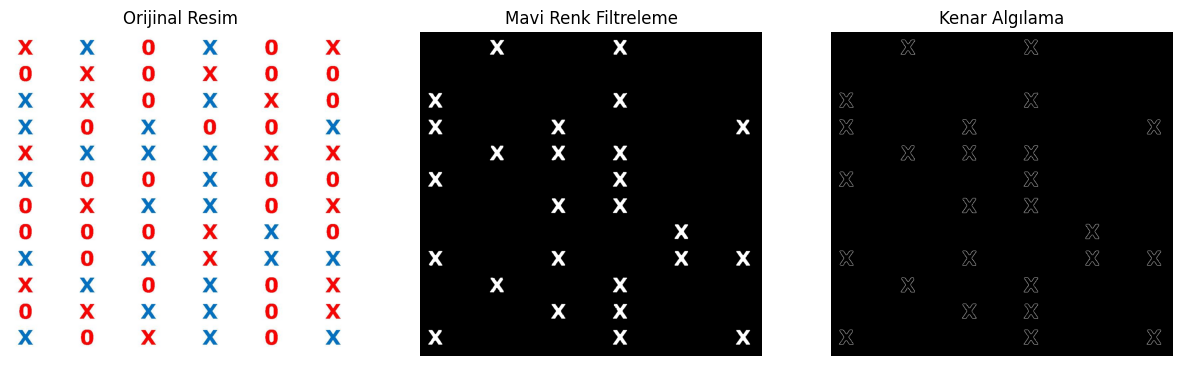

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Yüklenmiş resmin okunması
image = cv2.imread('red_x.png')

# RGB formatına dönüştürülmesi
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resmin HSV formatına çevirilmesi
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Mavi renk aralığını HSV'de tanımlanması
lower_blue = np.array([100, 150, 50])  # HSV renk değerlerinin alt sınırı
upper_blue = np.array([140, 255, 255])  # HSV renk değerlerinin üst sınırı

# Mask oluşturulması (mavi olan bölgeleri beyaz, geri kalanları siyah yapacak)
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Maskeye morfolojik işlemler uygulayarak gürültünün azaltılması
kernel = np.ones((3, 3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Kenar algılama (Canny edge detection)
edges = cv2.Canny(mask, 50, 150)

# Şekillerin bulunması (contours)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Mavi X işaretlerinin sayısının bulunması
x_count = 0
for cnt in contours:
    # Şeklin alanını kontrol edelim (X işareti olduğuna karar vermek için)
    area = cv2.contourArea(cnt)

    # X işaretleri belirli bir alan aralığında olmalı, çok küçük veya çok büyük şekilleri ihmal ediyoruz
    if 100 < area < 5000:  # Bu değerleri X'in boyutuna göre ayarlandı
        # Konturun minimum bounding rectangle (dikdörtgen çerçevesi)
        rect = cv2.minAreaRect(cnt)
        width, height = rect[1]

        # X işaretlerinin şeklinin kapladığı alanın düzgün dörtgen biçiminde olduğunu varsayıyoruz
        if 0.8 < width / height < 1.2:  # Genişlik ve yükseklik oranı yaklaşık 1 olmalı
            x_count += 1

print(f"Mavi X işaretlerinin sayısı: {x_count}")

# Sonuçların görselleştirilmesi (orijinal resim ve maske)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image_rgb)
axs[0].set_title("Orijinal Resim")
axs[0].axis('off')

axs[1].imshow(mask, cmap='gray')
axs[1].set_title("Mavi Renk Filtreleme")
axs[1].axis('off')

axs[2].imshow(edges, cmap='gray')
axs[2].set_title("Kenar Algılama")
axs[2].axis('off')

plt.show()
